In [92]:
import requests
import json
import time
import os
from bs4 import BeautifulSoup
import nltk
import pandas as pd
from nltk.tokenize import TweetTokenizer

# API

In [6]:
headers = {'api-key' : 'xxxxxx'}

In [31]:
section = 'technology'
from_date = '2016-01-01'
page_num = 1
page_size = 200

In [32]:
guardian_content = requests.get('https://content.guardianapis.com/search?section={0}&from-date={1}&show-tags=keyword&show-fields=wordcount%2Cbody%2CtrailText&page={2}&page-size={3}'.format(section, from_date, page_num, page_size),headers=headers)

In [33]:
jsonData = guardian_content.json()

{'response': {'currentPage': 1,
  'orderBy': 'newest',
  'pageSize': 200,
  'pages': 15,
  'results': [{'apiUrl': 'https://content.guardianapis.com/technology/2017/jan/17/governments-struggling-to-retain-trust-of-citizens-global-survey-finds',
    'fields': {'body': '<p>Weakened and distrusted central governments around the world have been incapable of responding to the way the internet and social media have empowered populist but previously fringe groups, a unique worldwide survey of government communication chiefs has found.</p> <p>The survey spanning 40 countries is the first international review to reveal how deeply governments feel they are losing control and authority over communications.</p> <p>It shows they have been collectively shaken by public distrust of governments, and are struggling to keep pace with how modern voters gather information and form their opinions. The advent of fake news, the dissemination of knowingly inaccurate news, has only deepened the crisis.</p> <p>T
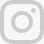

In [34]:
jsonData

In [40]:
title = jsonData["response"]["results"][0]["webTitle"]

In [41]:
text = jsonData["response"]["results"][0]["fields"]["body"]

In [42]:
title

'Governments struggling to retain trust of citizens, global survey finds'

In [43]:
text

'<p>Weakened and distrusted central governments around the world have been incapable of responding to the way the internet and social media have empowered populist but previously fringe groups, a unique worldwide survey of government communication chiefs has found.</p> <p>The survey spanning 40 countries is the first international review to reveal how deeply governments feel they are losing control and authority over communications.</p> <p>It shows they have been collectively shaken by public distrust of governments, and are struggling to keep pace with how modern voters gather information and form their opinions. The advent of fake news, the dissemination of knowingly inaccurate news, has only deepened the crisis.</p> <p>The study synthesising the responses of more than 300 communication chiefs was undertaken by the advertising and strategy group WPP and steered by a global advisory board spanning Australia, Europe, Asia and America, including leading academics and practitioners in co

# Files

In [52]:
cd '/Users/JustinGrace/Documents/Data/HackHappiness/guardian_api/technology/'

/Users/JustinGrace/Documents/Data/HackHappiness/guardian_api/technology


In [93]:
tknzr = TweetTokenizer()

In [105]:

import gensim
from gensim.models.doc2vec import TaggedDocument
from collections import namedtuple

In [111]:
tech_docs = []
NewsDocument = namedtuple('NewsDocument', 'words tags')

In [63]:
BeautifulSoup(d["response"]["results"][i]["fields"]["body"]).get_text()

//anaconda/envs/Py3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file //anaconda/envs/Py3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html.parser")

  markup_type=markup_type))


"It’s understandable that the world didn’t much care about Gamergate. The 2014 hashtag campaign, ostensibly founded to protest about perceived ethical failures in games journalism, clearly thrived on hate – even though many of those who aligned themselves with the movement either denied there was a problem with harassment, or wrote it off as an unfortunate side effect. Sure, women, minorities and progressive voices within the industry were suddenly living in fear. Sure, those who spoke out in their defence were quickly silenced through exhausting bursts of online abuse. But that wasn’t why people supported it, right? They were disenfranchised, felt ignored, and wanted to see a systematic change. Is this all sounding rather familiar now? Does it remind you of something? If you’re just discovering the world of angry, anonymous online dudes masquerading as victims – hi, come in. Some of us have been here for a while. The similarities between Gamergate and the far-right online movement, th

In [113]:
for filename in os.listdir('/Users/JustinGrace/Documents/Data/HackHappiness/guardian_api/technology/'):
    with open(filename) as json_data:
        d = json.load(json_data)
        i = 0
        for i in range(0,199):
            words = tknzr.tokenize(BeautifulSoup(d["response"]["results"][i]["fields"]["body"]).get_text())
            tags = d["response"]["results"][i]["webTitle"]
            tech_docs.append(NewsDocument(words, tags))

//anaconda/envs/Py3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file //anaconda/envs/Py3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html.parser")

  markup_type=markup_type))


In [118]:
tech_docs[5]

NewsDocument(words=['Bitcoin', 'has', 'started', '2017', 'with', 'a', 'bang', ',', 'with', 'its', 'value', 'hitting', 'a', 'three-year', 'high', 'of', 'more', 'than', '$', '1,000', '(', '£', '815', ')', '.', 'The', 'nascent', 'digital', 'currency', ',', 'which', 'has', 'been', 'criticised', 'as', 'a', 'vehicle', 'for', 'a', 'range', 'of', 'nefarious', 'characters', 'from', 'drug', 'dealers', 'to', 'tax', 'evaders', 'to', 'operate', ',', 'outperformed', 'all', 'its', 'central-bank-issued', 'counterparts', 'with', 'a', '125', '%', 'climb', 'in', 'value', 'in', '2016', '.', 'Market', 'watchers', 'have', 'suggested', 'that', 'the', 'soaring', 'value', 'may', 'have', 'been', 'boosted', 'in', 'the', 'past', 'year', 'by', 'increased', 'demand', 'in', 'China', 'on', 'the', 'back', 'of', 'a', '7', '%', 'fall', 'in', 'the', 'value', 'of', 'the', 'yuan', ';', 'this', 'was', 'the', 'Chinese', 'currency', '’', 's', 'weakest', 'annual', 'performance', 'in', 'more', 'than', '20', 'years', '.', 'Data'

In [119]:
from gensim.models import Doc2Vec
import gensim.models.doc2vec
from collections import OrderedDict
import multiprocessing

cores = multiprocessing.cpu_count()
assert gensim.models.doc2vec.FAST_VERSION > -1, "this will be painfully slow otherwise"

In [124]:
model = Doc2Vec(alpha=0.025, min_alpha=0.025)  # use fixed learning rate
model.build_vocab(tech_docs)
for epoch in range(10):
    model.train(tech_docs)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

In [125]:
model

In [146]:
model.most_similar('$', topn=200)

[('€', 0.8961286544799805),
 ('£', 0.8901193737983704),
 ('EUR', 0.7504019737243652),
 ('yuan', 0.7136768102645874),
 ('SEK', 0.6942880153656006),
 ('¥', 0.6815447807312012),
 ('Euros', 0.6644192337989807),
 ('rpm', 0.6466654539108276),
 ('rupees', 0.6409139633178711),
 ('Hz', 0.6391083598136902),
 ('Rs', 0.635564923286438),
 ('RMB', 0.624650239944458),
 ('cents', 0.6202151775360107),
 ('yen', 0.6198021173477173),
 ('megabytes', 0.6139944791793823),
 ('ft', 0.6056169271469116),
 ('tonnes', 0.5931720733642578),
 ('BTC', 0.5926722884178162),
 ('petabytes', 0.5893673300743103),
 ('RPM', 0.5816052556037903),
 ('metres', 0.5600998401641846),
 ('th', 0.5565611124038696),
 ('watts', 0.552822470664978),
 ('pounds', 0.5469897389411926),
 ('FTSE', 0.5466989278793335),
 ('exhibitors', 0.5435342192649841),
 ('units', 0.5393016338348389),
 ('pre-orders', 0.5378817915916443),
 ('quid', 0.536634087562561),
 ('miles', 0.5348994135856628),
 ('kilogram', 0.5340788960456848),
 ('litres', 0.53303313255310

In [139]:
query = model.infer_vector(['happy'])
model.docvecs.most_similar([query],topn=1000)

[('微', 0.45341041684150696),
 ('亮', 0.4530204236507416),
 ('中', 0.4529317617416382),
 ('态', 0.45278674364089966),
 ('生', 0.45275789499282837),
 ('治', 0.45270615816116333),
 ('箱', 0.4526137709617615),
 ('博', 0.45232099294662476),
 ('照', 0.4522759020328522),
 ('政', 0.4521316885948181),
 ('的', 0.45211780071258545),
 ('黑', 0.45203864574432373),
 ('e', 0.4249035120010376),
 ('国', 0.41701966524124146),
 ('з', 0.38579031825065613),
 ('о', 0.3856145143508911),
 ('е', 0.38553813099861145),
 ('в', 0.385479599237442),
 ('ь', 0.38546544313430786),
 ('с', 0.38545456528663635),
 ('а', 0.3854163885116577),
 ('н', 0.3853701651096344),
 ('к', 0.3853677213191986),
 ('д', 0.3853549361228943),
 ('ю', 0.38519635796546936),
 ('т', 0.38517898321151733),
 ('О', 0.38515645265579224),
 ('й', 0.38501325249671936),
 ('и', 0.38486456871032715),
 ('一', 0.36550650000572205),
 ('正', 0.3654501736164093),
 ('作', 0.3652569055557251),
 ('队', 0.36516547203063965),
 ('网', 0.36513635516166687),
 ('准', 0.3651125431060791),
 

In [140]:
d["response"]["results"][i]["webTitle"]

'E3 2011: Hitman Absolution – preview'

In [143]:
model.save('/Users/JustinGrace/Documents/gu_technews_model.doc2vec')